#Titanic dataset modelling  - Random Forest and other algorithms
---
###Algorithms
This kernel attempts to apply following Python ML algorithms for the study: 
* Random Forest
* Logistic

###Stages
The model has been built under following stages:
1. Data Import and Premilinary Check
2. Data Exploration and Visualisation 
3. Feature Engineering
4. Build and Run
5. Validate
6. Model Comparison 

##Stage 1: Data import and Premilinary Check

This stage helps in getting the idea of what the data comprises of - the size, the data type, missing values, the parameters/features i.e. data columns etc.


In [3]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load the dataset
data_train = pd.read_csv('D:/User_Rajan/Data_Science/Projects/Kaggle/Titanic/Data/train.csv')
data_test = pd.read_csv('D:/User_Rajan/Data_Science/Projects/Kaggle/Titanic/Data/test.csv')

# check a few sample data points
data_train.head()
data_train.sample(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
696,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S
478,479,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,350060,7.5208,NaN,S
697,698,1,3,"Mullens, Miss. Katherine ""Katie""",female,NaN,0,0,35852,7.7333,NaN,Q


In [4]:
# get the dataset shape
print("Train data set shape: ", data_train.shape)
print("Test data set shape: ", data_test.shape)

Train data set shape:  (891, 12)
Test data set shape:  (418, 11)


In [5]:
# get the dataset parameters
print("Train data set columns: ", data_train.columns.values)
print("Test data set columns: ", data_test.columns.values)

Train data set columns:  ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
Test data set columns:  ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [6]:
# check the dataset parameter datatype details 
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
# check the dataset parameter statistics detail 
data_train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Bazzani, Miss. Albina",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
# check for missing values
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###Feature's Data Type
* Survived: int
* Pclass: int
* Name: string
* Sex: string
* Age: float
* SibSp: int
* Parch: int
* Ticket: string
* Fare: float
* Cabin: string
* Embarked: string  

###Summary:
* **Numerical Features:** Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
* **Categorical Features:** Survived (Target), Sex, Embarked, Pclass (Ordinal)
* **Alphanumeric Features:** Ticket, Cabin


##Stage 2: Data Exploration and Visualisation

In this stage attempt is made to graphically look at ever parameter (columns) of the data set to understand underlying trend, distribution, corelation etc. 

###Sex

,Sex,Survived
0,female,0.742038
1,male,0.188908


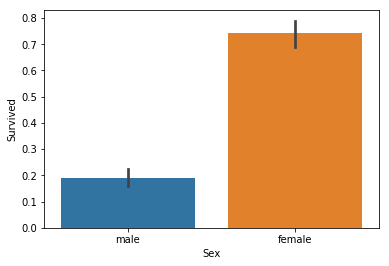

In [9]:
# check Sex versus Survived
sns.barplot(x="Sex", y="Survived", data=data_train);
data_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).agg({'Survived':np.mean})

###Embarked

C:\Users\Rajan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


  Embarked     Sex  Survived
0        C  female        64
1        C    male        29
2        Q  female        27
3        Q    male         3
4        S  female       140
5        S    male        77


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


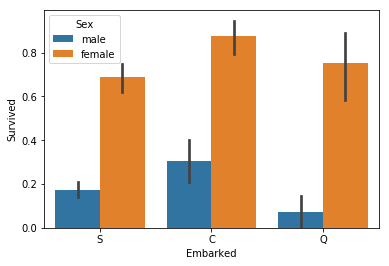

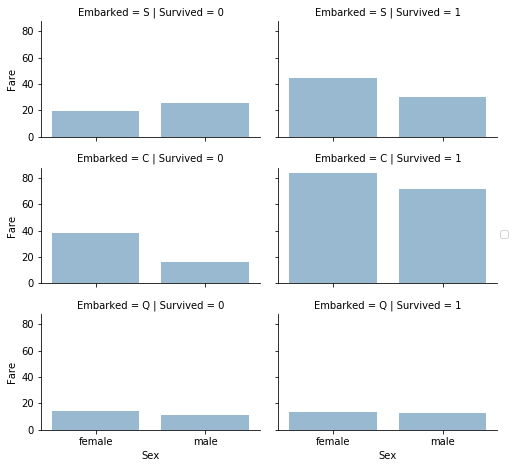

In [10]:
# check Embarked versus Survived
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=data_train)
grid = sns.FacetGrid(data_train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()
print(data_train.groupby(['Embarked', 'Sex'], as_index=False).agg({'Survived':sum}))
data_train.groupby(['Embarked'], as_index=False).agg({'Survived':np.mean})

###Pclass

C:\Users\Rajan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Rajan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


   Pclass     Sex  Survived
0       1  female        91
1       1    male        45
2       2  female        70
3       2    male        17
4       3  female        72
5       3    male        47


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


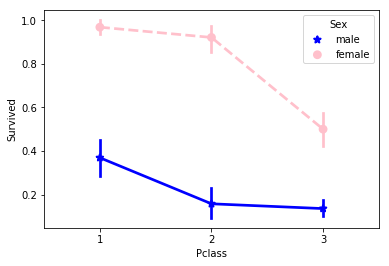

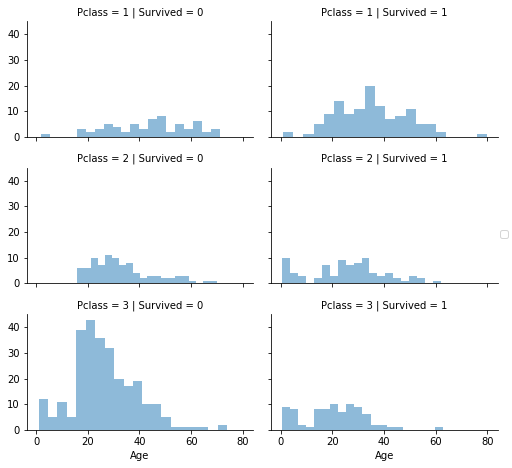

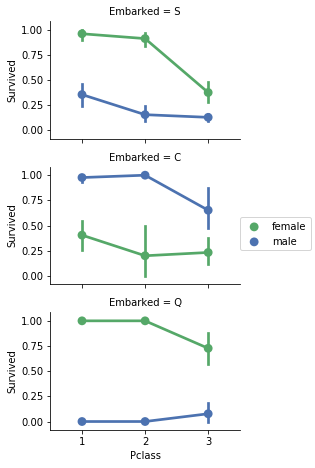

In [11]:
# check Pclass versus Survived
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data_train,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);
grid = sns.FacetGrid(data_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();
g1 = sns.FacetGrid(data_train, row='Embarked', size=2.2, aspect=1.6)
g1.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
g1.add_legend()
print(data_train.groupby(['Pclass', 'Sex'], as_index=False).agg({'Survived':sum}))
data_train.groupby(['Pclass'], as_index=False).agg({'Survived':np.mean})

###SibSp

    SibSp     Sex  Survived
0       0  female       137
1       0    male        73
2       1  female        80
3       1    male        32
4       2  female        10
5       2    male         3
6       3  female         4
7       3    male         0
8       4  female         2
9       4    male         1
10      5  female         0
11      5    male         0
12      8  female         0
13      8    male         0


,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


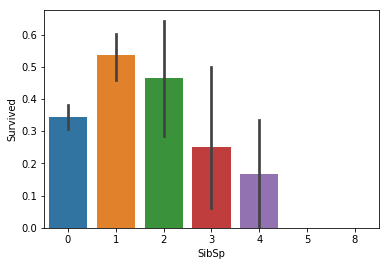

In [12]:
#check SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=data_train);
print(data_train.groupby(['SibSp', 'Sex'], as_index=False).agg({'Survived':sum}))
data_train.groupby(['SibSp'], as_index=False).agg({'Survived':np.mean})

###Parch

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


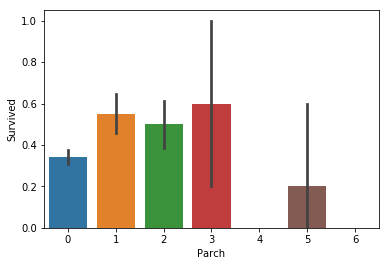

In [13]:
#check Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=data_train);
data_train.groupby(['Parch'], as_index=False).agg({'Survived':np.mean})

###Age

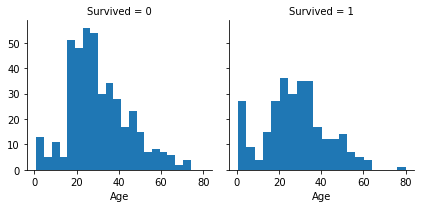

In [14]:
#check Age vs. Survival
g = sns.FacetGrid(data_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

###Fare

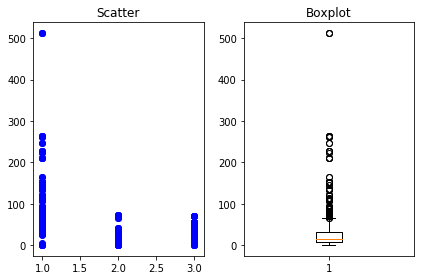

In [15]:
# Create a figure with 1x2 subplot and make the left subplot active
plt.subplot(1, 2, 1) 
plt.scatter(data_train['Pclass'], data_train['Fare'], color='b')
plt.title('Scatter')

# Make the right subplot active in the current 1x2 subplot grid
plt.subplot(1, 2, 2)
plt.boxplot(data_train['Fare'])
plt.title('Boxplot')

# Use plt.tight_layout() to improve the spacing between subplots
plt.tight_layout()
plt.show()

##Stage 3: Feature Engineering  
Feature Engineering is a method to create relevant/new features by combining/tranforming existing features.  
In this stage we will implement the following:  
* Create new features
* Missing value treatment
* Outlier treatment
* Drop redundant features
* Encode categorical features as integeral labels

###Extract Title and Surname from "Name"

In [16]:
# the surname is followed by a coma "," then by title which in turn is followed by period "." in the name string 
def extract_title(dataset):
    Part_name = dataset.Name.apply(lambda x: x.split('.')[0])    
    dataset['Surname'] = Part_name.apply(lambda x: x.split(',')[0].strip())
    dataset['Title'] = Part_name.apply(lambda x: x.split(',')[1].strip())
    return dataset
data_train = extract_title(data_train)
data_test = extract_title(data_test)
pd.crosstab(data_train['Title'], data_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [17]:
#replace various titles with more common names
def title_update(dataset):
    dataset['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona', 'the Countess'],
                             'Rare', inplace=True)
    dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal', inplace=True)
    dataset['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace=True)
    return dataset    

data_train = title_update(data_train)
data_test = title_update(data_test)
print(pd.crosstab(data_test['Title'], data_test['Sex']))
print(data_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())
pd.crosstab(data_train['Title'], data_train['Sex'])

Sex     female  male
Title               
Master       0    21
Miss        79     0
Mr           0   240
Mrs         72     0
Rare         1     5
    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.318182
5   Royal  1.000000


Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Rare,3,19
Royal,0,1


### Missing value treatment of "Age"

In [18]:
data_train[['Title', 'Age']].groupby(['Title'], as_index=False).agg({'Age':np.median})

,Title,Age
0,Master,3.5
1,Miss,21.0
2,Mr,30.0
3,Mrs,35.0
4,Rare,48.0
5,Royal,49.0


In [19]:
# create imputable value for Age on the basis of Title
print(data_train[['Title', 'Age']].isnull().sum())
print(data_train.shape)
print(data_train.groupby(['Title'], as_index=False).agg({'Age':np.mean}))
train_title_age = data_train[['Title', 'Age']].dropna()
train_title_age.groupby(['Title'], as_index=False).agg({'Age':np.median})

Title      0
Age      177
dtype: int64
(891, 14)
    Title        Age
0  Master   4.574167
1    Miss  21.845638
2      Mr  32.368090
3     Mrs  35.788991
4    Rare  45.380952
5   Royal  49.000000


,Title,Age
0,Master,3.5
1,Miss,21.0
2,Mr,30.0
3,Mrs,35.0
4,Rare,48.0
5,Royal,49.0


In [20]:
print(data_train[['Title', 'Age']].isnull().sum())
print(data_train.shape)
data_train.groupby(['Title'], as_index=False).agg({'Age':np.mean})

Title      0
Age      177
dtype: int64
(891, 14)


,Title,Age
0,Master,4.574167
1,Miss,21.845638
2,Mr,32.368090
3,Mrs,35.788991
4,Rare,45.380952
5,Royal,49.000000


In [21]:
# impute missing value of Age using median values of corresponding Title
def update_miss_age(row):
    applied_age = {'Master': 3.5, 'Miss':21.0, 'Mr':30.0, 'Mrs':35.0, 'Rare':48.0, 'Royal':49.0}    
    if np.isnan(row['Age']):
        row['Age'] = applied_age[row['Title']]
    return row
data_train = data_train.apply(update_miss_age, axis=1)
data_test = data_test.apply(update_miss_age, axis=1)
print(data_train[['Title', 'Age']].isnull().sum())
print(data_train.shape)
print(data_train.groupby(['Title'], as_index=False).agg({'Age':np.mean}))

Title    0
Age      0
dtype: int64
(891, 14)
    Title        Age
0  Master   4.466750
1    Miss  21.681081
2      Mr  31.823017
3     Mrs  35.682540
4    Rare  45.500000
5   Royal  49.000000


In [22]:
print(data_train[['Title', 'Age']].isnull().sum())
print(data_train.shape)
data_train.groupby(['Title'], as_index=False).agg({'Age':np.mean})

Title    0
Age      0
dtype: int64
(891, 14)


,Title,Age
0,Master,4.466750
1,Miss,21.681081
2,Mr,31.823017
3,Mrs,35.682540
4,Rare,45.500000
5,Royal,49.000000


### Bin the "Age"

In [23]:
# apply cut function to bin the age
def bin_age(df):
    bins = (0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df['AgeGroup'] = categories
    return df
data_train = bin_age(data_train)
data_test = bin_age(data_test)
data_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,AgeGroup
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S,Harrison,Mr,Adult
335,336,0,3,"Denkoff, Mr. Mitto",male,30.0,0,0,349225,7.8958,NaN,S,Denkoff,Mr,Young Adult
648,649,0,3,"Willey, Mr. Edward",male,30.0,0,0,S.O./P.P. 751,7.5500,NaN,S,Willey,Mr,Young Adult
744,745,1,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,NaN,S,Stranden,Mr,Young Adult
726,727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3,0,31027,21.0000,NaN,S,Renouf,Mrs,Young Adult


### Missing value treatment of "Embark (train dataset)" and "Fare (test dataset)"

In [24]:
# the two missing values in "Embark" is replaced with max count
print(data_train.shape)
print(data_train.isnull().sum())
print(data_test.isnull().sum())
print(data_train['Embarked'].value_counts())
data_train['Embarked'].fillna('S', inplace=True)
data_test['Fare'].fillna(data_train['Fare'].mean(), inplace=True)
print(data_train.shape)
print(data_train.isnull().sum())
print(data_test.isnull().sum())

(891, 15)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Surname          0
Title            0
AgeGroup         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Surname          0
Title            0
AgeGroup         0
dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64
(891, 15)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Surname          0
Title            0
AgeGroup         0
dtype: int64
PassengerId      0
Pclass           0
Name       

### Bin the "Fare"

In [25]:
# check for outliers in "Fare"
# TODO
# apply "qcut" function to bin the fare into percentile based group
print(data_train['Fare'].describe())
def bin_fare(df):
    categories = pd.qcut(df['Fare'], 4, labels = [1, 2, 3, 4])
    df['FareGroup'] = categories
    return df
data_train = bin_fare(data_train)
data_test = bin_fare(data_test)
print(data_train['FareGroup'].value_counts())
data_train.sample(5)

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
2    224
1    223
4    222
3    222
Name: FareGroup, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,AgeGroup,FareGroup
444,445,1,3,"Johannesen-Bratthammer, Mr. Bernt",male,30.0,0,0,65306,8.1125,NaN,S,Johannesen-Bratthammer,Mr,Young Adult,2
484,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C,Bishop,Mr,Student,4
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S,Hamalainen,Mrs,Student,3
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S,Sunderland,Mr,Teenager,2
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Ryerson,Miss,Teenager,4


###Drop redundant features

In [26]:
# drop redundant features
print(data_train.shape, data_test.shape)
print(data_train.columns.values)
def drop_features(df):
    drop_feature_list = ['Name', 'Age', 'Ticket', 'Cabin', 'Surname', 'Fare']
    return df.drop(columns = drop_feature_list)
data_train1 = drop_features(data_train)
data_test1 = drop_features(data_test)
print(data_train1.shape, data_test1.shape)
print(data_train1.columns.values)


(891, 16) (418, 15)
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked' 'Surname' 'Title' 'AgeGroup'
 'FareGroup']
(891, 10) (418, 9)
['PassengerId' 'Survived' 'Pclass' 'Sex' 'SibSp' 'Parch' 'Embarked'
 'Title' 'AgeGroup' 'FareGroup']


###Encode categorical features as integeral labels

In [27]:
# the categorical features are encoded mapped with integral values - this improves the efficiency of algorithms
data_train1.describe(include='all')
data_test1.describe(include='all')
data_train1.info()
data_train1['Embarked'].value_counts()
#for param in data_train1.columns.tolist():
#    print(data_train1[param].unique())
def encode_features(df):
    df['Sex'] = df['Sex'].map({'male':1, 'female':2})
    df['Embarked'] = df['Embarked'].map({'S':1, 'C':2, 'Q':3})
    df['Title'] = df['Title'].map({'Mr':1, 'Mrs':2, 'Miss':3, 'Master':4, 'Rare':5, 'Royal':6})
    df['AgeGroup'] = df['AgeGroup'].map({'Student':1, 'Adult':2, 'Young Adult':3, 'Baby':4, 'Teenager':5, 'Child':6, 'Senior':7})
    return df
data_train1 = encode_features(data_train1)
data_test1 = encode_features(data_test1)
#for param in data_train1.columns.tolist():
#    print(data_train1[param].unique())
data_train1.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Parch          891 non-null int64
Embarked       891 non-null object
Title          891 non-null object
AgeGroup       891 non-null category
FareGroup      891 non-null category
dtypes: category(2), int64(5), object(3)
memory usage: 58.1+ KB


,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareGroup
768,769,0,3,1,1,0,3,1,3,3
157,158,0,3,1,0,0,1,1,3,2
619,620,0,2,1,0,0,1,1,3,2
349,350,0,3,1,0,0,1,1,2,2
876,877,0,3,1,0,0,1,1,1,2


##Stage 4: Build and Run Models


###Split the Training dataset

In [28]:
from sklearn.model_selection import train_test_split
X_all = data_train1.drop(['Survived', 'PassengerId'], axis=1)
y_all = data_train1['Survived']
print(data_train1.shape, X_all.shape, y_all.shape)
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

(891, 10) (891, 8) (891,)


###Create and fine tune the model

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

###Calculate accuracy

In [30]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8044692737430168


##Stage 5:  Validation - TODO

In [31]:
"""from sklearn.cross_validation import KFold

def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)"""

'from sklearn.cross_validation import KFold\n\ndef run_kfold(clf):\n    kf = KFold(891, n_folds=10)\n    outcomes = []\n    fold = 0\n    for train_index, test_index in kf:\n        fold += 1\n        X_train, X_test = X_all.values[train_index], X_all.values[test_index]\n        y_train, y_test = y_all.values[train_index], y_all.values[test_index]\n        clf.fit(X_train, y_train)\n        predictions = clf.predict(X_test)\n        accuracy = accuracy_score(y_test, predictions)\n        outcomes.append(accuracy)\n        print("Fold {0} accuracy: {1}".format(fold, accuracy))     \n    mean_outcome = np.mean(outcomes)\n    print("Mean Accuracy: {0}".format(mean_outcome)) \n\nrun_kfold(clf)'

##Create Submission CSV

In [32]:
ids = data_test1['PassengerId']
predictions = clf.predict(data_test1.drop('PassengerId', axis=1))


output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('titanic_submission.csv', index = False)
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


## Inspiration:
* [Titanic Survival Predictions (Beginner)](https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner)
* [Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
* [Scikit-Learn ML from Start to Finish](https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish)